# Experimentacion

## Experimento 1 - Comparación entre golosos

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [6]:
import tqdm
import pcmi
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

In [3]:
def extract_instance_size(df: pd.DataFrame) -> pd.DataFrame:
    """Agrega al dataframe una columna con el tamaño de las instancias."""
    # https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply
    df = df.copy()
    def attrs(s):
        # CMI_n10.in
        s["n"] = int(s["Instancia"].split('.')[0].split('_n')[1])
        return s

    df = df.apply(attrs, axis=1)
    return df

In [3]:
mypath    = "../instancias"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
inFiles   = [file for file in onlyfiles if file.split(".")[1] == "in"]
outFiles  = [file for file in onlyfiles if file.split(".")[1] == "out"]

In [4]:
golosos    = ["S-LF", "W", "WP", "C"]
tabusearch = ["TSS-E", "TSS-C", "TSC-E", "TSC-C"]
algoritmos = golosos + tabusearch

In [6]:
columnas = ["Instancia", "Inicial", "Tabu", "Time", "Impacto", "Optimo", "Algoritmo", "PorcentajeV"]
dfTabu   = pd.DataFrame(columns = columnas)
dfTabu   = dfTabu.astype({"Impacto":"int32", "Optimo":"int32", "PorcentajeV": "int32"})

#for porcentaje in tqdm.tqdm(range(25, 125, 25)):
for tabu in tabusearch:
    for inicial in golosos:
        for file in inFiles:
                instancia = f"../instancias/{file}"
                salida    = f"../instancias/{file[:-3]}.out"

                solucion, tiempo, optimo = pcmi.run(tabu, instancia, salida, inicial, 1000, 100, 50, False, True)
                impacto, coloreo = solucion

                entry  = {'Instancia': file, 'Inicial': inicial, 'Tabu': tabu, 'Time': tiempo*1000, 
                        'Impacto': int(impacto), 'Optimo': int(optimo), 'Algoritmo': f"{tabu}-{inicial}", 'PorcentajeV': porcentaje}
                dfTabu = dfTabu.append(entry, ignore_index=True)
                
dfTabu["Gap"] = (dfTabu["Optimo"] - dfTabu["Impacto"])/dfTabu["Optimo"]

NameError: name 'porcentaje' is not defined

In [35]:
dfTabu2 = dfTabu.groupby(["Tabu", "Inicial", "Instancia"]).mean().reset_index()
dfTabu2 = extract_instance_size(dfTabu2)
dfTabu2.sort_values(by=['Instancia']).head()

,Tabu,Inicial,Instancia,Impacto,Optimo,PorcentajeV,Gap,n
0,TSC-C,C,CMI_n10.in,3,3,50,0.000000,10
65,TSC-E,S-LF,CMI_n10.in,3,3,50,0.000000,10
117,TSS-C,S-LF,CMI_n10.in,3,3,50,0.000000,10
52,TSC-E,C,CMI_n10.in,3,3,50,0.000000,10
130,TSS-C,W,CMI_n10.in,2,3,50,0.333333,10


In [42]:
dfTabu

,Instancia,Inicial,Tabu,Time,Impacto,Optimo,Algoritmo,PorcentajeV,Gap
0,CMI_n30.in,S-LF,TSS-E,5057.700,39,47,TSS-E-S-LF,50,0.170213
1,CMI_n14.in,S-LF,TSS-E,672.309,8,12,TSS-E-S-LF,50,0.333333
2,CMI_n20.in,S-LF,TSS-E,3059.270,13,25,TSS-E-S-LF,50,0.480000
3,CMI_n6.in,S-LF,TSS-E,192.869,1,1,TSS-E-S-LF,50,0.000000
4,CMI_n24.in,S-LF,TSS-E,2423.370,17,33,TSS-E-S-LF,50,0.484848
...,...,...,...,...,...,...,...,...,...
203,CMI_n28.in,C,TSC-C,60681.300,44,48,TSC-C-C,50,0.083333
204,CMI_n26.in,C,TSC-C,65513.900,35,38,TSC-C-C,50,0.078947
205,CMI_n12.in,C,TSC-C,927.289,14,16,TSC-C-C,50,0.125000
206,CMI_n16.in,C,TSC-C,2721.560,18,20,TSC-C-C,50,0.100000


In [11]:
columnas = ["Instancia", "Algoritmo", "Time", "Impacto", "Optimo"]
dfGoloso = pd.DataFrame(columns = columnas)
dfGoloso = dfGoloso.astype({"Impacto":"int32", "Optimo":"int32"})

for repeat in range(10):
    for algoritmo in golosos:
        for file in inFiles:
            instancia = f"../instancias/{file}"
            salida    = f"../instancias/{file[:-3]}.out"
            solucion, tiempo, optimo = pcmi.run(algoritmo, instancia, salida)
            impacto, coloreo = solucion

            entry    = {'Instancia': file, 'Algoritmo': algoritmo, 'Time': tiempo*1000, 'Impacto': int(impacto), 'Optimo': int(optimo)}
            dfGoloso = dfGoloso.append(entry, ignore_index=True)
            
dfGoloso["Gap"] = (dfGoloso["Optimo"] - dfGoloso["Impacto"])/dfGoloso["Optimo"]

In [13]:
dfGoloso.sort_values(by=['Instancia'])
dfGoloso = extract_instance_size(dfGoloso)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'CMI_n6.in'),
  Text(1, 0, 'CMI_n8.in'),
  Text(2, 0, 'CMI_n10.in'),
  Text(3, 0, 'CMI_n12.in'),
  Text(4, 0, 'CMI_n14.in'),
  Text(5, 0, 'CMI_n16.in'),
  Text(6, 0, 'CMI_n18.in'),
  Text(7, 0, 'CMI_n20.in'),
  Text(8, 0, 'CMI_n22.in'),
  Text(9, 0, 'CMI_n24.in'),
  Text(10, 0, 'CMI_n26.in'),
  Text(11, 0, 'CMI_n28.in'),
  Text(12, 0, 'CMI_n30.in')])

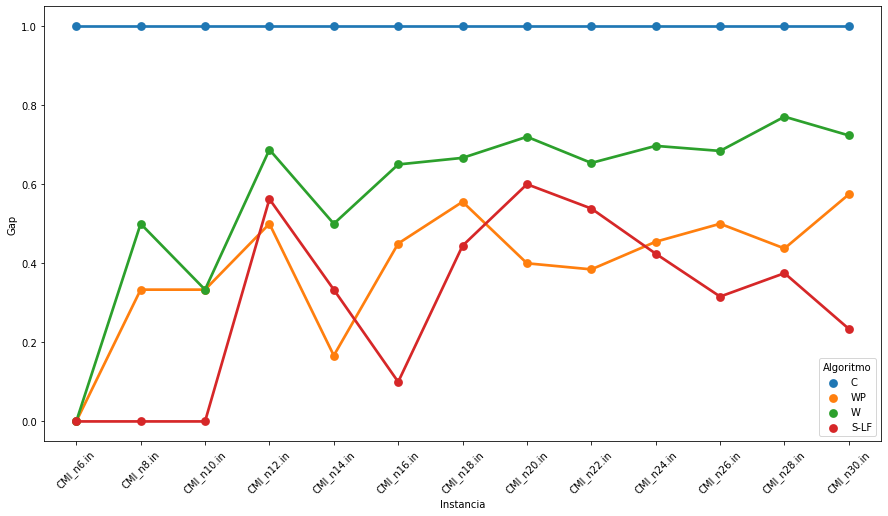

In [14]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfGoloso.sort_values(by=['n']), x="Instancia", y="Gap", hue="Algoritmo")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

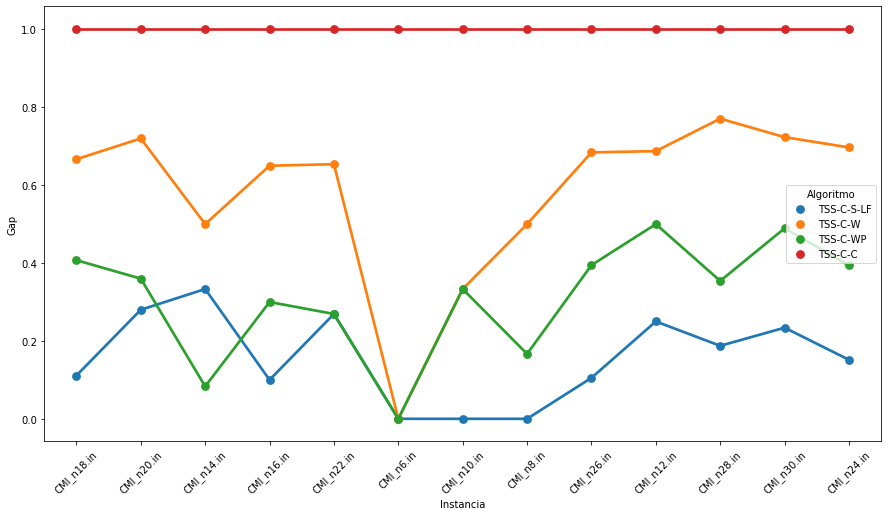

In [33]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfTabu[(dfTabu["Tabu"]=="TSS-C") & (dfTabu["PorcentajeV"] == 10)], x="Instancia", y="Gap", hue="Algoritmo")
plt.xticks(rotation=45)

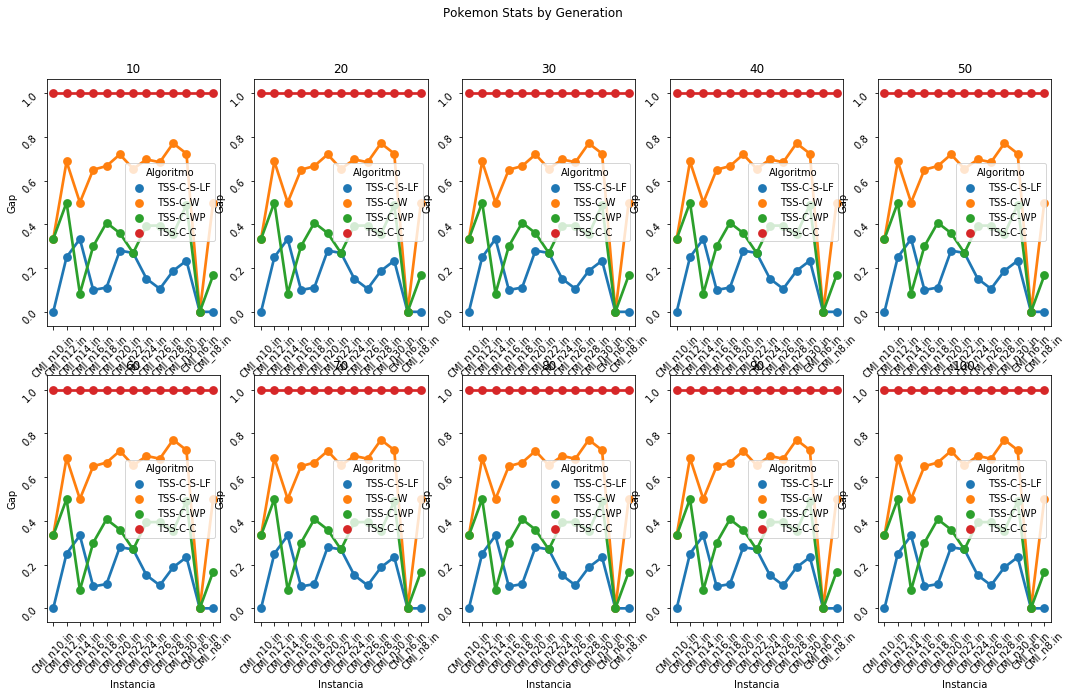

In [47]:
# plt.figure(figsize=(15,8))
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

fig.suptitle('Pokemon Stats by Generation')
for i in range (1, 11):
    g = sns.pointplot(ax=axes[math.floor((i-1)/5), (i-1)%5], data=dfTabu[(dfTabu["Tabu"]=="TSS-C") & (dfTabu["PorcentajeV"] == i*10)].sort_values(by=['Instancia']), x="Instancia", y="Gap", hue="Algoritmo")
    axes[math.floor((i-1)/5), (i-1)%5].set_title(i*10)
    axes[math.floor((i-1)/5), (i-1)%5].tick_params(labelrotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

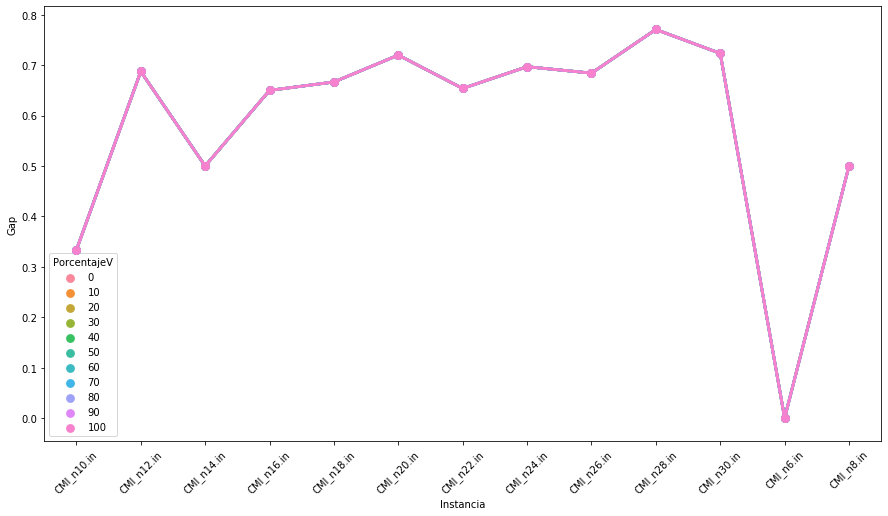

In [49]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfTabu[dfTabu["Algoritmo"]=="TSS-C-W"].sort_values(by=['Instancia']), x="Instancia", y="Gap", hue="PorcentajeV")
plt.xticks(rotation=45)

# Conclusiones: no hay conclusiones

## Optimizacion meta-parametros tabu search

In [14]:
def run_tabu(
        df: pd.DataFrame,
        file: str,
        algorithm: str,
        initialAlgorithm: str,
        it: int,
        mem_size: int,
        percent: int,
        aspirar: bool,
    ) -> pd.DataFrame:

    instancia = f"../instancias/{file}"
    salida    = f"../instancias/{file[:-3]}.out"

    res, debug = pcmi.run(
        algorithm,
        instancia,
        salida,
        initialAlgorithm,
        it,
        mem_size,
        percent,
        aspirar,
    )

    entry  = {
        "Instancia": file,
        "Inicial": initialAlgorithm,
        "Iteraciones": it,
        "CantMemoria": mem_size,
        "PorcentajeVecindad": percent,
        "Aspirar": aspirar,
        "Tabu": algorithm,
        "Algoritmo": f"{algorithm}-{initialAlgorithm}",
        "Time": debug.tiempo*1000, 
        "Impacto": res.impacto,
        "Optimo": debug.optimo,
        "ItEfectivas": int(debug.it_efectivas),
        "N": int(file.split('.')[0].split('_n')[1]),
        "Gap": (debug.optimo - res.impacto) / debug.optimo,
    }

    return df.append(entry, ignore_index=True)

dfTabu = pd.DataFrame(columns = [
    "Instancia",
    "Inicial",
    "Iteraciones",
    "ItEfectivas",
    "CantMemoria",
    "PorcentajeVecindad",
    "Aspirar",
    "Tabu",
    "Algoritmo",
    "Time",
    "Impacto",
    "Optimo",
    "N",
])

"""
cada color sol 1 byte
cada coloreo n bytes

vector<Coloreo> mem

mem es O(|estr| * mem_size)

para coloreo
    n * mem_size bytes
    30 * mem_size bytes

para estructura 2 bytes
    swap (vertice, vertice)
    change (vertice, color)

    2 * mem_size bytes

n^n espacio de sol
"""

"""hip
- a mas it menos memoria

"""

iniciales    = ["S-LF", "W", "WP", "C"]
tabusearch = ["TSS-E", "TSS-C", "TSC-E", "TSC-C"]
algoritmos = golosos + tabusearch

PORCENTAJES = range(5, 105, 5) # definidos
MEMORIA = list(range(5, 50, 5)) + list(range(50, 550, 50))
ITERACIONES = range(100, 1100, 100)
ASPIRAR = [True, False]
#trainFiles = list(filter(lambda f: int(f.split('.')[0].split('n')[1]) % 4 != 0, inFiles))
trainFiles = ["CMI_n20.in", "CMI_n30.in", "CMI_n10.in"]

for tabu in tqdm.tqdm(tabusearch):
    for inicial in iniciales:
        for file in trainFiles:
            #for percent in PORCENTAJES:
                #for memoria in MEMORIA:
                    #for it in ITERACIONES:
                        #for aspirar in ASPIRAR:
            #file = "CMI_n30.in"
            #inicial = "W"
            it = 100
            memoria = 10
            percent = 100
            aspirar = False
            dfTabu = run_tabu(dfTabu, file, tabu, inicial, it, memoria, percent, aspirar)


print("Done!")

100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

Done!


In [15]:
dfTabu

,Instancia,Inicial,Iteraciones,ItEfectivas,CantMemoria,PorcentajeVecindad,Aspirar,Tabu,Algoritmo,Time,Impacto,Optimo,Gap,N
0,CMI_n20.in,S-LF,100,100,10,100,False,TSS-E,TSS-E-S-LF,2504.610,18,25,0.280000,20.0
1,CMI_n30.in,S-LF,100,100,10,100,False,TSS-E,TSS-E-S-LF,6472.230,36,47,0.234043,30.0
2,CMI_n10.in,S-LF,100,100,10,100,False,TSS-E,TSS-E-S-LF,583.516,3,3,0.000000,10.0
3,CMI_n20.in,W,100,100,10,100,False,TSS-E,TSS-E-W,7276.140,7,25,0.720000,20.0
4,CMI_n30.in,W,100,100,10,100,False,TSS-E,TSS-E-W,15595.200,13,47,0.723404,30.0
5,CMI_n10.in,W,100,100,10,100,False,TSS-E,TSS-E-W,1294.710,2,3,0.333333,10.0
6,CMI_n20.in,WP,100,100,10,100,False,TSS-E,TSS-E-WP,6480.460,16,25,0.360000,20.0
7,CMI_n30.in,WP,100,100,10,100,False,TSS-E,TSS-E-WP,7078.380,23,47,0.510638,30.0
8,CMI_n10.in,WP,100,100,10,100,False,TSS-E,TSS-E-WP,1324.010,2,3,0.333333,10.0
9,CMI_n20.in,C,100,100,10,100,False,TSS-E,TSS-E-C,7840.990,0,25,1.000000,20.0


<AxesSubplot:xlabel='Iteraciones', ylabel='CantMemoria'>

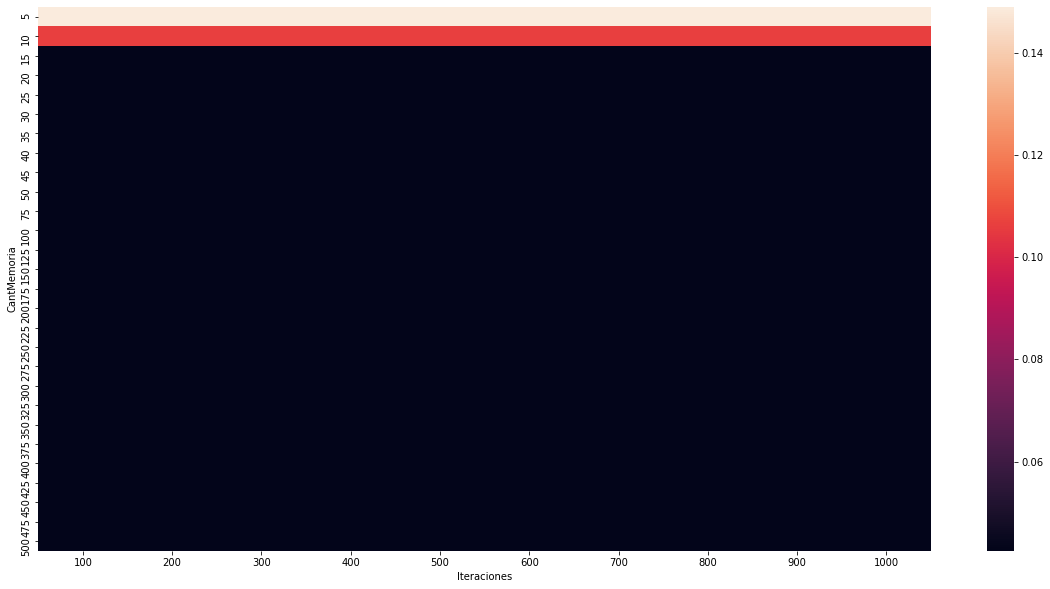

In [31]:
plt.figure(figsize=(20,10))
df = dfTabu[(dfTabu["Algoritmo"] == "TSC-C-W") & (dfTabu["Instancia"] == "CMI_n30.in")]
piv = df.pivot_table(index='CantMemoria', columns='Iteraciones', values='Gap', aggfunc='mean')
sns.heatmap(piv)
#sns.scatterplot(data=df, x="", y="Gap", hue="")

In [ ]:
sns.scatterplot()

<AxesSubplot:xlabel='PorcentajeVecindad', ylabel='Gap'>

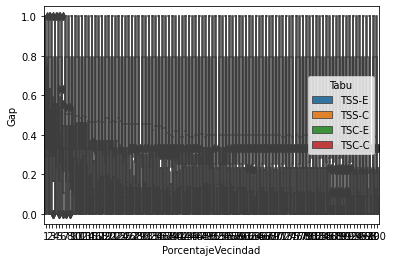

In [54]:
sns.boxplot(data=dfTabu, x="PorcentajeVecindad", y="Gap", hue="Tabu")